In [366]:
import numpy as np
from scipy import optimize as opt
import matplotlib.pyplot as plt

## Člen

### Popis geometrije

In [367]:
# Podatki
alpha_k = 30
alpha_r = np.deg2rad(alpha_k)
pk = 9.52
a = 0.8567 * pk
f = 0.6128 * a
L = 1.86 * pk
h1 = 0.33 * pk
h2 = 0.7 * pk
h3 = 1.115 * pk

# Pridobi iz standarda
r0 = 28
r1 = 2.6
r2 = 5.5
r3 = 1.2
r4 = 14.3
r5 = 1.8

In [368]:
# AB
def x1(t1, x01):
    return x01 + r0 * np.cos(t1)
def y1(t1, y01):
    return y01 + r0 * np.sin(t1)
# BC
def x2(t2, x02):
    return x02 + r1 * np.cos(t2)
def y2(t2, y02):
    return y02 + r1 * np.sin(t2)
# CD
def x3(t3, x03):
    return x03 + r2 * np.cos(t3)
def y3(t3, y03):
    return y03 + r2 * np.sin(t3)
# DE
def x4(t4, x04):
    return x04 + t4 * np.sin(alpha_r)
def y4(t4, y04):
    return y04 - t4 * np.cos(alpha_r)
# EF
def x5(t5, x05):
    return x05 + r3 * np.cos(t5)
def y5(t5, y05):
    return y05 + r3 * np.sin(t5)
# FG
def x6(t6, x06):
    return x06 + r4 * np.cos(t6)
def y6(t6, y06):
    return y06 + r4 * np.sin(t6)
# GH
def x7(t7, x07):
    return x07 + r5 * np.cos(t7)
def y7(t7, y07):
    return y07 + r5 * np.sin(t7)

In [369]:
def enacbe(priblizki):
    t1A, t1B, t2B, t2C, t3C, t3D, t4D, t4E, t5E, t5F, t6F, t6G, t7G, t7H, x01, y01, x02, y02, x03, y03, x04, y04, x05, y05, x06, y06, x07, y07 = priblizki
    # Zveznost x: 6
    e1 = x2(t2B, x02) - x1(t1B, x01)
    e2 = x3(t3C, x03) - x2(t2C, x02)
    e3 = x4(t4D, x04) - x3(t3D, x03)
    e4 = x5(t5E, x05) - x4(t4E, x04)
    e5 = x6(t6F, x06) - x5(t5F, x05)
    e6 = x7(t7G, x07) - x6(t6G, x06)
    # Zveznost y: 6
    e7 = y2(t2B, y02) - y1(t1B, y01)
    e8 = y3(t3C, y03) - y2(t2C, y02)
    e9 = y4(t4D, y04) - y3(t3D, y03)
    e10 = y5(t5E, y05) - y4(t4E, y04)
    e11 = y6(t6F, y06) - y5(t5F, y05)
    e12 = y7(t7G, y07) - y6(t6G, y06)
    # Odvodi: 8
    e13 = np.pi / 2 - t1A
    e14 = t2B - t1B
    e15 = t3C - t2C
    e16 = np.pi + alpha_r - t3D
    e17 = t3D - t5E
    e18 = t6F - t5F
    e19 = t7G - np.pi - t6G
    e20 = np.pi / 2 - t7H
    # Ostalo: 8
    e21 = 0.5 * a - x1(t1A, x01)
    e22 = h1 - y1(t1A, y01)
    e23 = 0.5 * a - 0.5 * L - x3(t3C, x03)
    e24 = - f * np.cos(alpha_r) - x4(t4D, x04)
    e25 = - f * np.sin(alpha_r) - y4(t4D, x04)
    e26 = h1 - h3 - y5(t5F, y05)
    e27 = h1 - h2 - y07
    e28 = 0.5 * a - x7(t7H, x07)
    return (e1, e2, e3, e4, e5, e6, e7, e8, e9, e10, e11, e12, e13, e14, e15, e16, e17, e18, e19, e20, e21, e22, e23, e24, e25, e26, e27, e28)

In [370]:
zac_priblizki = np.ones(28)
resitev = list(opt.fsolve(enacbe, zac_priblizki))

# +- 2 * pi, da dobmo prave dele kroga
for i, element in enumerate(resitev):
    if i < 14 and (i != 7 or i != 8):
        if element > 2 * np.pi:
            resitev[i] = element - 2 * int(element / (2 * np.pi)) * np.pi
        elif - element > 2 * np.pi:
            resitev[i] = element + 2 * int(-element / (2 * np.pi)) * np.pi
        if i % 2 == 1 and i < 12:
            if resitev[i] < resitev[i - 1]:
                resitev[i] += 2 * np.pi
if resitev[13] > 2 * np.pi:
    resitev[13] -= 2 * np.pi
if resitev[13] > resitev[12]:
    resitev[12] += 2 * np.pi
            
t1A, t1B, t2B, t2C, t3C, t3D, t4D, t4E, t5E, t5F, t6F, t6G, t7G, t7H, x01, y01, x02, y02, x03, y03, x04, y04, x05, y05, x06, y06, x07, y07 = resitev

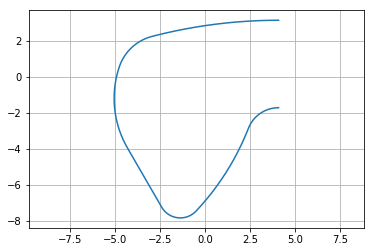

In [371]:
st_t_c = 50 # Število_točk_člen -> število točk, ki jih uporabim na posamezni krivulji
tocke_clen_x = []
tocke_clen_y = []
funkcije = [x1, y1, x2, y2, x3, y3, x4, y4, x5, y5, x6, y6, x7, y7]
konst = [x01, y01, x02, y02, x03, y03, x04, y04, x05, y05, x06, y06, x07, y07]
for i in range(0, 14, 2):
    zac, kon = resitev[i], resitev[i+1]
    t = np.linspace(zac, kon, st_t_c)
    for x in funkcije[i](t, konst[i]):  # Doda posamezen x na skupni seznam tocke_clen_x
        tocke_clen_x.append(x)
    for y in funkcije[i+1](t, konst[i+1]):  # Doda posamezen y na skupni seznam tocke_clen_y
        tocke_clen_y.append(y)
'''
# Posebej za zadnji radij, ker gre t v neg. smer
zac, kon = resitev[12], resitev[13]
t = np.linspace(kon, zac, st_t_c)
for x in funkcije[12](t, konst[12]):  # Doda posamezen x na skupni seznam tocke_clen_x
    tocke_clen_x.append(x)
for y in funkcije[13](t, konst[13]):  # Doda posamezen y na skupni seznam tocke_clen_y
    tocke_clen_y.append(y)
    # plt.plot(funkcije[i](t, konst[i]), funkcije[i+1](t, konst[i+1]))  # posamezna krivulja...pisano
    # plt.plot(a-funkcije[i](t, konst[i]), funkcije[i+1](t, konst[i+1]))  # še druga polovic
'''
tocke_clen_x = np.array(tocke_clen_x)
tocke_clen_y = np.array(tocke_clen_y)
plt.plot(tocke_clen_x, tocke_clen_y)
plt.axis('equal')
plt.grid()
plt.show()
    

### Vrtenje člena

In [372]:
def obrni(seznam_x, seznam_y, kot):  # kot v rad
    nov_seznam_x = []
    nov_seznam_y = []
    for x_z, y_z in zip(seznam_x, seznam_y):  # x_zacetni, y_zacetni
        x_n = x_z * np.cos(kot) - y_z * np.sin(kot)  # novi x
        y_n = x_z * np.sin(kot) + y_z * np.cos(kot)  # novi y
        nov_seznam_x.append(x_n)
        nov_seznam_y.append(y_n)
    return (np.array(nov_seznam_x), np.array(nov_seznam_y))

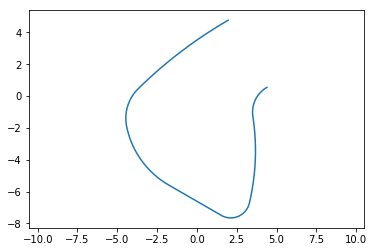

In [373]:
obrnjen_x, obrnjen_y = obrni(tocke_clen_x, tocke_clen_y, np.pi/6)
plt.plot(obrnjen_x, obrnjen_y)
plt.axis('equal')
plt.show()

## Evolventa

In [374]:
# http://www.otvinta.com/gear.html, predloga strojni elementi 2
m = 2.3  # modul je celo število
z = 35
x = -0.5  # koeficient profilnega pomika
d = m * z  # premer razdelnega kroga
alpha_r  # radiani, ostane že od zgoraj naveden
V = x * m  # profilni pomik
h_a = m # višina zoba
h_f = 1.25 * m  # višina vznožja zoba
d_f = d - 2.5 * m + 2 * m * x  # vznožni krog
d_a = d + 2 * m + 2 * m * x # temenski krog, za začetek vzel člen k*m
d_b = d * np.cos(alpha_r)  # osnovni in tudi kinematski krog (pri ravnem ozobju) - slednja sovpada z drugim zobnikom
eqation_const = d_b / 2
u_min = 0

In [375]:
def f_x_evolventa(u):
    return eqation_const * (np.cos(u) + u * np.sin(u))

def f_y_evolventa(u):
    return eqation_const * (np.sin(u) - u * np.cos(u))

x_evolventa0 = []
y_evolventa0 = []

# iščem u_max
st_ = 0
u_zac = u_min
razlika = 10
while razlika >= 0:
    u_zac += 0.00001
    x_u = f_x_evolventa(u_zac)
    y_u = f_y_evolventa(u_zac)
    r_u = np.sqrt(x_u ** 2 + y_u ** 2)
    razlika = d_a / 2 - r_u
    x_evolventa0.append(x_u)
    y_evolventa0.append(y_u)
    st_ += 1
    if abs(r_u - d / 2) < 0.0001:
        dy = y_u
u_max = u_zac  # podan na 0.0001 natančno
u_max

0.6407999999997185

In [376]:
st_t_z = 50
delitelj = int(st_ / st_t_z) + 1
x_evolventa0 = x_evolventa0[::delitelj]
y_evolventa0 = y_evolventa0[::delitelj]
st_t_z = len(x_evolventa0)

In [377]:
s_d = np.pi * m / 2  # debelina zoba na razdelniem krogu
s_b = s_d + 2 * dy
ksi = 2 * np.arctan((s_b / 2) / (d_b / 2))
np.rad2deg(ksi)  # ni čisto točno ...

12.991418551464912

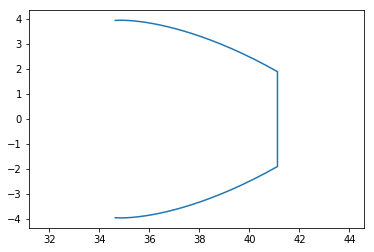

In [378]:
st_t_r = 40  # število točk ravnina
x_evolventa1, y_evolventa1 = obrni(x_evolventa0, y_evolventa0, -ksi / 2)
x_zob = list(x_evolventa1) + st_t_r * [x_evolventa1[-1]] + list(x_evolventa1)[::-1]
y_zob = list(-y_evolventa1) + list(np.linspace(-y_evolventa1[-1], y_evolventa1[-1], st_t_r)) + list(y_evolventa1[::-1])
plt.plot(x_zob, y_zob)
plt.axis('equal')
plt.show()

## Zobnik in člen

In [379]:
'''
# Premik člena
y_premik = - min(tocke_clen_y) + d / 2 - 1.6 * m  # Zadnje 1.6 ne sme biti
tocke_clen_y += y_premik

# Zasuk zoba
kot = 1.4 * np.pi / 3
kot_absolutni = kot
x_zob_obr, y_zob_obr = obrni(x_zob, y_zob, kot)
'''

'\n# Premik člena\ny_premik = - min(tocke_clen_y) + d / 2 - 1.6 * m  # Zadnje 1.6 ne sme biti\ntocke_clen_y += y_premik\n\n# Zasuk zoba\nkot = 1.4 * np.pi / 3\nkot_absolutni = kot\nx_zob_obr, y_zob_obr = obrni(x_zob, y_zob, kot)\n'

In [380]:
'''
plt.plot(tocke_clen_x, tocke_clen_y)
plt.plot(x_zob_obr, y_zob_obr)
plt.axis('equal')
plt.grid()
plt.show()
'''

"\nplt.plot(tocke_clen_x, tocke_clen_y)\nplt.plot(x_zob_obr, y_zob_obr)\nplt.axis('equal')\nplt.grid()\nplt.show()\n"

[36, 47, -2.2739041533174387, 40.68653866587434, -2.1605238093567682, 40.63892015234719, 0.12297408355899668]
[38, 48, -2.0599030648824557, 40.8864636094785, -2.0311089761283156, 40.87830365605266, 0.029927986686263255]


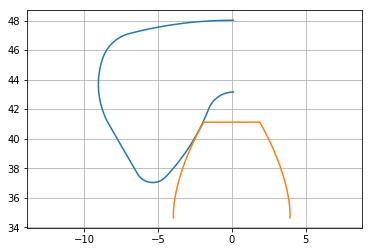

In [394]:
# Začetni položaj
# Premik člena
x_clen_zac = tocke_clen_x - 0.5 * a
y_premik = - min(tocke_clen_y) + d / 2 - 1.4 * m  # Zadnje 1.4 ne sme biti
y_clen_zac = tocke_clen_y + y_premik

# Zasuk zoba
kot = np.pi / 2
kot_absolutni = kot
x_zob_zac, y_zob_zac = obrni(x_zob, y_zob, kot)

# Točka kontakta
# Grobo
min_razdalja = None
for i, (x_c, y_c) in enumerate(zip(x_clen_zac[5 * st_t_c: 6 * st_t_c + 1], y_clen_zac[5 * st_t_c: 6 * st_t_c + 1])):
    for j, (x_z, y_z) in enumerate(zip(x_zob_zac[: st_t_z], y_zob_zac[: st_t_z])):
        razdalja = np.sqrt((x_c - x_z) ** 2 + (y_c - y_z) ** 2)
        if min_razdalja == None:
            min_razdalja = [i, j, x_c, y_c, x_z, y_z, razdalja]
        elif razdalja < min_razdalja[-1]:
            min_razdalja = [i, j, x_c, y_c, x_z, y_z, razdalja]
print(min_razdalja)

# Nastavitev na točen začetek
dx = min_razdalja[4] - min_razdalja[2]
x_clen_zac += dx

# Prva točka kontakta
# Za obravnavo bomo imeli seznam "analiza" seznamov v obliki [i, j, x_c, y_c, x_z, y_z, razdalja]
analiza = []
min_razdalja = None
for i, (x_c, y_c) in enumerate(zip(x_clen_zac[5 * st_t_c: 6 * st_t_c + 1], y_clen_zac[5 * st_t_c: 6 * st_t_c + 1])):
    for j, (x_z, y_z) in enumerate(zip(x_zob_zac[: st_t_z], y_zob_zac[: st_t_z])):
        razdalja = np.sqrt((x_c - x_z) ** 2 + (y_c - y_z) ** 2)
        if min_razdalja == None:
            min_razdalja = [i, j, x_c, y_c, x_z, y_z, razdalja]
        elif razdalja < min_razdalja[-1]:
            min_razdalja = [i, j, x_c, y_c, x_z, y_z, razdalja]
analiza.append(min_razdalja)
print(min_razdalja)

# Izris
plt.plot(x_clen_zac, y_clen_zac)
plt.plot(x_zob_zac, y_zob_zac)
plt.axis('equal')
plt.grid()
plt.show()

In [384]:
def premik(x_clen, y_clen, x_zob, y_zob, korak):
    if kot_absolutni > np.pi / 2:
        "Konec obravnave! Kot je večji od pi/2"
        return
    else:   
        
        kot_absolutni += korak

## Luknja

In [274]:
gama = np.deg2rad(3.67)
pch = 9.518
ro1 = 0.165 * pch
Hb = 0.425 * pch
Hb_ = 0.415 * pch

ro2 = 31.5
ro3 = 0.12
ro4 = 8.9

In [275]:
def u1(z1, u01):
    return u01 + ro1 * np.cos(z1)
def w1(z1, w01):
    return w01 + ro1 * np.sin(z1)

def u2(z2, u02):
    return u02 + ro2 * np.cos(z2)
def w2(z2, w02):
    return w02 + ro2 * np.sin(z2)

def u3(z3, u03):
    return u03 + ro3 * np.cos(z3)
def w3(z3, w03):
    return w03 + ro3 * np.sin(z3)

def u4(z4, u04):
    return u04 + ro4 * np.cos(z4)
def w4(z4, w04):
    return w04 + ro4 * np.sin(z4)

In [276]:
def enacbe_luknja(pri_luknja):
    z1A, z1B, z2B, z2C, z3C, z3D, z4D, z4E, u01, w01, u02, w02, u03, w03, u04, w04 = pri_luknja
    # zveznost x: 3
    e1 = u2(z2B, u02) - u1(z1B, u01)
    e2 = u3(z3C, u03) - u2(z2C, u02)
    e3 = u4(z4D, u04) - u3(z3D, u03)
    # Zveznost y: 3
    e4 = w2(z2B, w02) - w1(z1B, w01)
    e5 = w3(z3C, w03) - w2(z2C, w02)
    e6 = w4(z4D, w04) - w3(z3D, w03)
    # Odvodi: 5
    e7 = z1A
    e8 = z2B - z1B
    e9 = z3C - z2C
    e10 = z4D - z3D + np.pi
    e11 = z4E
    # Ostalo: 5
    e12 = u01
    e13 = w01
    e14 = ro1 - Hb - u3(z3D, u03)
    e15 = ro1 - Hb_ - u4(z4E, u04)
    e16 = w04
    return (e1, e2, e3, e4, e5, e6, e7, e8, e9, e10, e11, e12, e13, e14, e15, e16)

In [277]:
pri_luknja = np.ones(16)
resitev_luknja = list(opt.fsolve(enacbe_luknja, pri_luknja))

print(resitev_luknja)
z1A, z1B, z2B, z2C, z3C, z3D, z4D, z4E, u01, w01, u02, w02, u03, w03, u04, w04 = resitev_luknja

[1.52613425228916e-24, 1.5914346266658432, 1.5914346266658432, 1.6657001683431139, 1.6657001683431139, 3.287972284866576, 0.1463796312767829, 7.138754028639753e-24, -2.227821133887969e-21, -3.833786950614599e-21, 0.6176507659792217, -29.9231561428264, -2.3559633258426573, 1.315634154476691, -11.2795, 1.2375874296827626e-21]


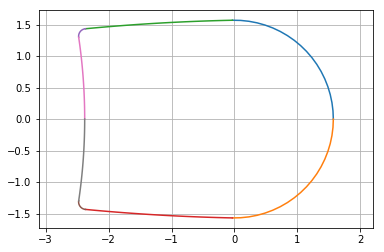

In [288]:
funkcije = [u1, w1, u2, w2, u3, w3, u4, w4]
konst = [u01, w01, u02, w02, u03, w03, u04, w04]
for i in range(0, 8, 2):
    zac, kon = resitev_luknja[i], resitev_luknja[i+1]
    t = np.linspace(zac, kon, 20)
    plt.plot(funkcije[i](t, konst[i]), funkcije[i+1](t, konst[i+1]))
    plt.plot(funkcije[i](t, konst[i]), -funkcije[i+1](t, konst[i+1]))
plt.axis('equal')
plt.grid()
plt.show()

## Zatič

In [279]:
Sm = 0.07 * pch
PH = Sm + ro1 - Hb
PH_ = Sm + ro1 - Hb_

Pb = 3
k0 = 6
k1 = 0.5
k2 = 2
k3 = 0.35
k4 = 3.8

In [280]:
def j1(h1, j01):
    return j01 + k0 * np.cos(h1)
def f1(h1, f01):
    return f01 + k0 * np.sin(h1)

def j2(h2, j02):
    return j02 + k1 * np.cos(h2)
def f2(h2, f02):
    return f02 + k1 * np.sin(h2)

def j3(h3, j03):
    return j03 + k2 * np.cos(h3)
def f3(h3, f03):
    return f03 + k2 * np.sin(h3)

def j4(h4, j04):
    return j04 + k3 * np.cos(h4)
def f4(h4, f04):
    return f04 + k3 * np.sin(h4)

def j5(h5, j05):
    return j05 + k4 * np.cos(h5)
def f5(h5, f05):
    return f05 + k4 * np.sin(h5)

In [281]:
def enacbe_zatic(pri_zatic):
    h1A, h1B, h2B, h2C, h3C, h3D, h4D, h4E, h5E, h5F, j01, f01, j02, f02, j03, f03, j04, f04, j05, f05 = pri_zatic
    # Zveznost x: 4
    e1 = j2(h2B, j02) - j1(h1B, j01)
    e2 = j3(h3C, j03) - j2(h2C, j02)
    e3 = j4(h4D, j04) - j3(h3D, j03)
    e4 = j5(h5E, j05) - j4(h4E, j04)
    # Zveznost y: 4
    e5 = f2(h2B, f02) - f1(h1B, f01)
    e6 = f3(h3C, f03) - f2(h2C, f02)
    e7 = f4(h4D, f04) - f3(h3D, f03)
    e8 = f5(h5E, f05) - f4(h4E, f04)
    # Odvodi: 6
    e9 = h1A
    e10 = h2B - h1B
    e11 = h3C - h2C
    e12 = h4D - h3D
    e13 = h5E - h4E - np.pi
    e14 = h5F
    # Ostalo: 6
    e15 = j01 + Sm + k0
    e16 = f01
    e17 = f2(h2C, f02) - Pb / 2
    e18 = j4(h4E, j04) - PH + Sm
    e19 = j05 - PH_ + Sm + k4
    e20 = f05
    return (e1, e2, e3, e4, e5, e6, e7, e8, e9, e10, e11, e12, e13, e14, e15, e16, e17, e18, e19, e20)

In [282]:
#pri_zatic = (0, 1, 1.5, 1.5, 1.5, 1.7, 1.7, 1.9, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)
pri_zatic = np.ones(20)
resitev_zatic = list(opt.fsolve(enacbe_zatic, pri_zatic))

# +- 2 * pi, da dobimo prave dele kroga ... za luknjo
for i, element in enumerate(resitev_zatic[0:10]):
        if element > 2 * np.pi:
            resitev_zatic[i] = element - 2 * int(element / (2 * np.pi)) * np.pi
        elif - element > 2 * np.pi:
            resitev_zatic[i] = element + 2 * int(-element / (2 * np.pi)) * np.pi
        if i % 2 == 1 and i < 8:
            if resitev_zatic[i] < resitev_zatic[i - 1]:
                resitev_zatic[i] += 2 * np.pi

print(resitev_zatic)
h1A, h1B, h2B, h2C, h3C, h3D, h4D, h4E, h5E, h5F, j01, f01, j02, f02, j03, f03, j04, f04, j05, f05 = resitev_zatic

[9.884901252238699e-30, 0.1828666101967686, 0.1828666101967686, 1.5447021508176402, 1.5447021508176402, 2.102353044576166, 2.102353044576166, 3.365881013836664, 0.22428836024687107, -1.8817676041931337e-29, -6.66626, -7.326173604069164e-28, -1.2579645626858624, 1.0001702168802897, -1.2971013848314181, -0.4993191324808538, -2.1334465789473684, 0.9230123043531169, -6.179499999999999, 3.832532196179165e-46]


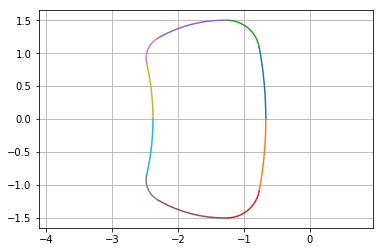

In [283]:
funkcije = [j1, f1, j2, f2, j3, f3, j4, f4, j5, f5]
konst = [j01, f01, j02, f02, j03, f03, j04, f04, j05, f05]
for i in range(0, 10, 2):
    zac, kon = resitev_zatic[i], resitev_zatic[i+1]
    t = np.linspace(zac, kon, 20)
    plt.plot(funkcije[i](t, konst[i]), funkcije[i+1](t, konst[i+1]))
    plt.plot(funkcije[i](t, konst[i]), -funkcije[i+1](t, konst[i+1]))
plt.axis('equal')
plt.grid()
plt.show()